In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import lightgbm as lgb
import xgboost as xgb

In [18]:
# Load the Titanic dataset
titanic_data = pd.read_csv("titanic_train.csv")

In [19]:
# Convert Age to float
titanic_data['Age'] = titanic_data['Age'].astype(float)

# Convert Ticket and Cabin to categorical 
titanic_data['Ticket'] = titanic_data['Ticket'].astype('object')
titanic_data['Cabin'] = titanic_data['Cabin'].astype('object')

# Convert Name to object
titanic_data['Name'] = titanic_data['Name'].astype('object')

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic_data.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
# Check for missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64


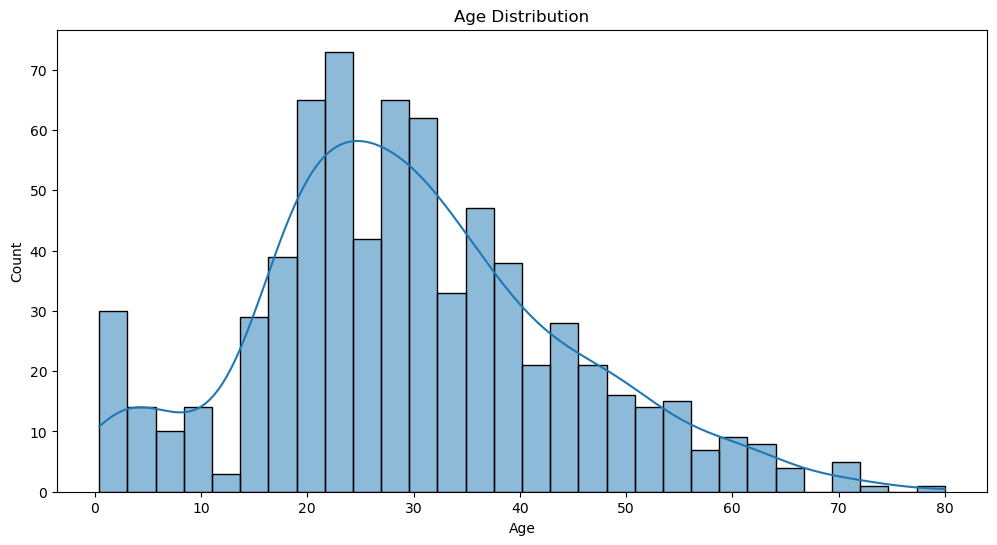

In [7]:
# Explore data distributions using histograms and box plots
plt.figure(figsize=(12, 6))
sns.histplot(titanic_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

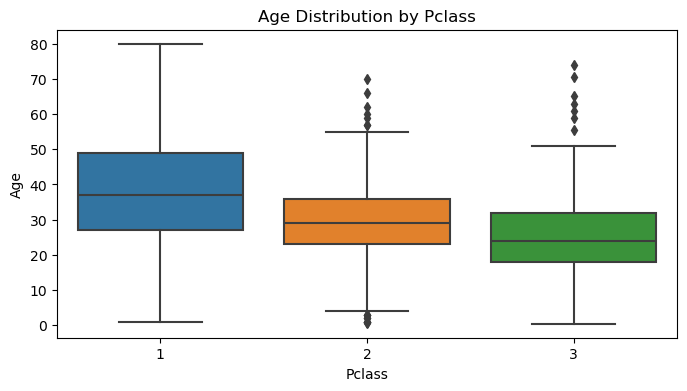

In [8]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Pclass', y='Age', data=titanic_data)
plt.title('Age Distribution by Pclass')
plt.show()

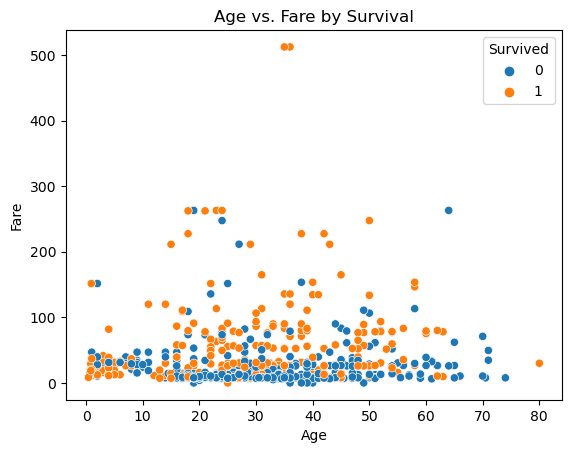

In [9]:
# Visualize relationships between features and survival using scatter plots and bar plots
sns.scatterplot(x='Age', y='Fare', data=titanic_data, hue='Survived')
plt.title('Age vs. Fare by Survival')
plt.show()

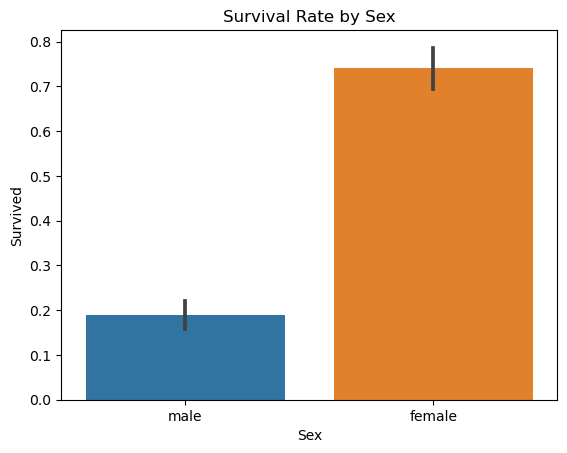

In [10]:
sns.barplot(x='Sex', y='Survived', data=titanic_data)
plt.title('Survival Rate by Sex')
plt.show()


In [11]:
# Data Preprocessing
# Handle missing values
titanic_data.fillna('Unknown', inplace=True) 

In [12]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


In [13]:
# Apply standard scaler to all numerical columns except Survived
scaler = StandardScaler()
for col in titanic_data.select_dtypes(include=['int64', 'float64']).drop('Survived', axis=1).columns:
    titanic_data[col] = scaler.fit_transform(titanic_data[col].values.reshape(-1, 1))


In [14]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(5), int64(1), object(4)
memory usage: 69.7+ KB


In [15]:
# Print the preprocessed dataset
print(titanic_data.head())

   PassengerId  Survived    Pclass  \
0    -1.730108         0  0.827377   
1    -1.726220         1 -1.566107   
2    -1.722332         1  0.827377   
3    -1.718444         1 -1.566107   
4    -1.714556         0  0.827377   

                                                Name     Sex   Age     SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0  0.432793   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0  0.432793   
2                             Heikkinen, Miss. Laina  female  26.0 -0.474545   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0  0.432793   
4                           Allen, Mr. William Henry    male  35.0 -0.474545   

      Parch      Fare Embarked  
0 -0.473674 -0.502445        S  
1 -0.473674  0.786845        C  
2 -0.473674 -0.488854        S  
3 -0.473674  0.420730        S  
4 -0.473674 -0.486337        S  


In [20]:
# Apply label encoder to categorical columns
le = LabelEncoder()
for col in titanic_data.select_dtypes(include='object').columns:
    titanic_data[col] = le.fit_transform(titanic_data[col])

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb

In [67]:
# Split into training and testing sets
X = titanic_data.drop('Survived', axis=1)
y = titanic_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [68]:
# Train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(random_state=42)

In [69]:
import pandas as pd
titanic_test=pd.read_csv('titanic_test.csv')

In [70]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [71]:
titanic_test.drop(['Ticket', 'Cabin'], axis=1, inplace=True)

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
import xgboost as xgb



In [73]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [74]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_lgb = lgb_model.predict(X_test)

In [75]:
# Calculate metrics
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
precision_lgb = precision_score(y_test, y_pred_lgb)
recall_lgb = recall_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb)


In [76]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

In [77]:
# Print results
print("LightGBM Model:")
print("Accuracy:", accuracy_lgb)
print("Precision:", precision_lgb)
print("Recall:", recall_lgb)
print("F1-score:", f1_lgb)


LightGBM Model:
Accuracy: 0.8435754189944135
Precision: 0.8484848484848485
Recall: 0.7567567567567568
F1-score: 0.8000000000000002


In [78]:
print("\nXGBoost Model:")
print("Accuracy:", accuracy_xgb)
print("Precision:", precision_xgb)
print("Recall:", recall_xgb)
print("F1-score:", f1_xgb)


XGBoost Model:
Accuracy: 0.7988826815642458
Precision: 0.7878787878787878
Recall: 0.7027027027027027
F1-score: 0.7428571428571429


In [79]:
# Print confusion matrix  for LightGBM
confusion_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
print("\nLightGBM Confusion Matrix:")
print(confusion_matrix_lgb)


LightGBM Confusion Matrix:
[[95 10]
 [18 56]]


In [80]:
# Print confusion matrix for XGBoost
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nXGBoost Confusion Matrix:")
print(confusion_matrix_xgb)


XGBoost Confusion Matrix:
[[91 14]
 [22 52]]


In [81]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_lgb = {'num_leaves': [31, 63, 127], 'max_depth': [-1, 5, 10], 'learning_rate': [0.01, 0.1, 0.3]}
param_grid_xgb = {'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.3], 'n_estimators': [100, 200, 300]}


In [82]:
# Create GridSearchCV objects
grid_search_lgb = GridSearchCV(lgb_model, param_grid_lgb, cv=5, scoring='accuracy')
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy')


In [83]:
# Fit models with grid search
grid_search_lgb.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 788
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [84]:
# Best parameters and scores
best_params_lgb = grid_search_lgb.best_params_
best_score_lgb = grid_search_lgb.best_score_
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_


In [85]:
print("Best Parameters for LightGBM:", best_params_lgb)
print("Best Score for LightGBM:", best_score_lgb)
print("Best Parameters for XGBoost:", best_params_xgb)
print("Best Score for XGBoost:", best_score_xgb)

Best Parameters for LightGBM: {'learning_rate': 0.1, 'max_depth': 5, 'num_leaves': 31}
Best Score for LightGBM: 0.8243967300305328
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100}
Best Score for XGBoost: 0.8384910863784103


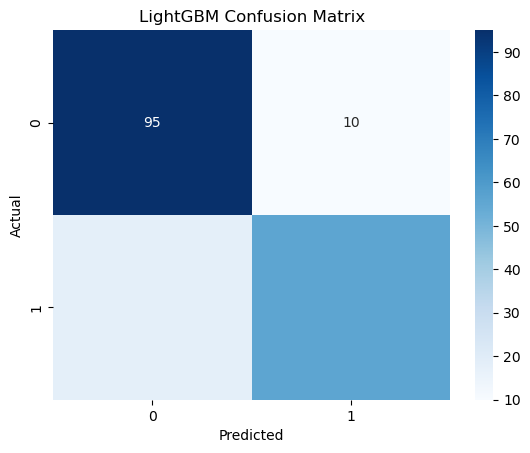

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_lgb/y_pred_xgb are your actual and predicted labels

# LightGBM Confusion Matrix
confusion_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(confusion_matrix_lgb, annot=True, cmap='Blues', fmt='d')
plt.title('LightGBM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

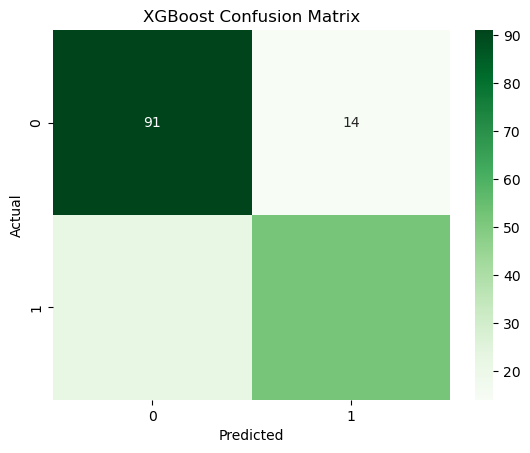

In [87]:
# XGBoost Confusion Matrix
confusion_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(confusion_matrix_xgb, annot=True, cmap='Greens', fmt='d')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

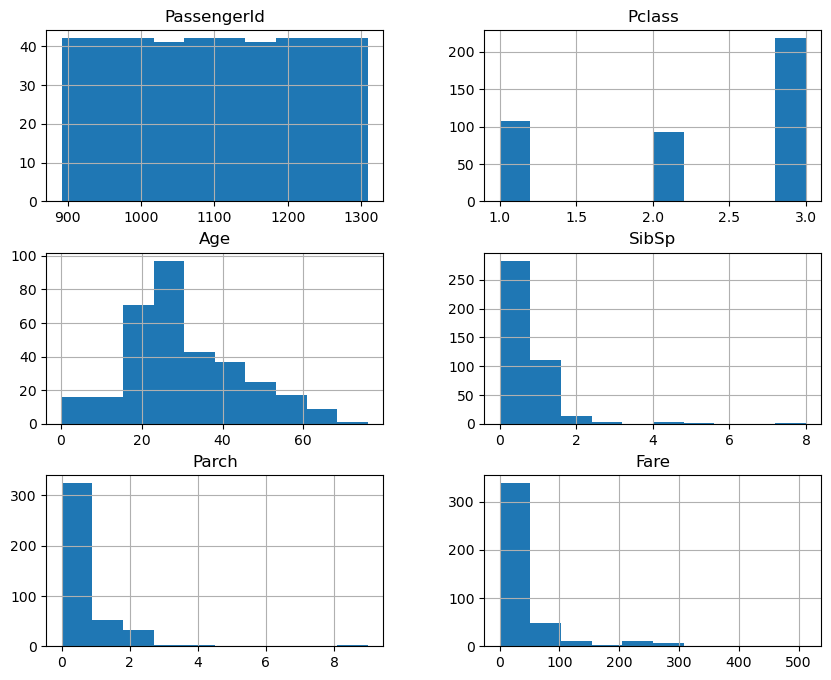

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
titanic_test.hist(figsize=(10, 8))
plt.show()

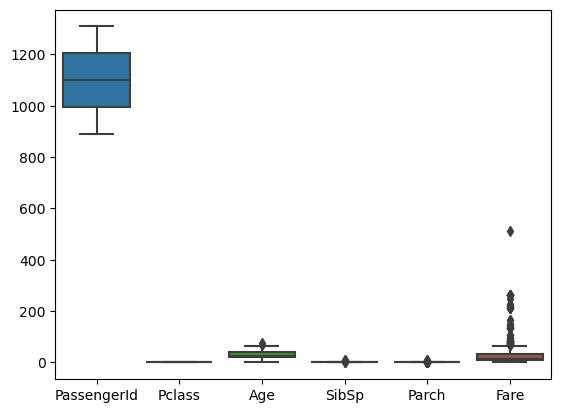

In [89]:
# Box plots
sns.boxplot(data=titanic_test)
plt.show()

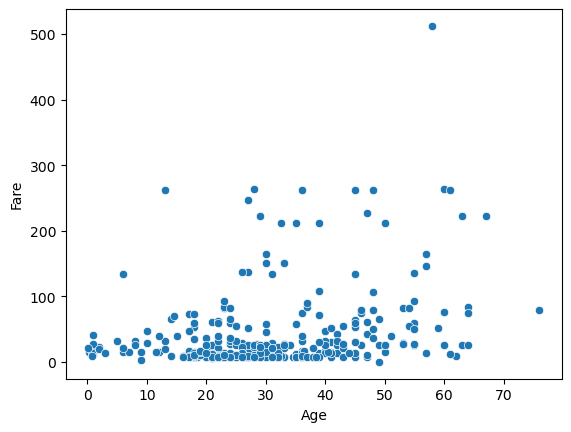

In [90]:
# Scatter plot (e.g., age vs. fare)
sns.scatterplot(x='Age', y='Fare', data=titanic_test)
plt.show()

In [91]:
# Handle missing values (e.g., impute missing age with mean)
titanic_test['Age'] = titanic_test['Age'].fillna(titanic_test['Age'].mean())


In [92]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Sex', 'Embarked']
for col in categorical_cols:
    le = LabelEncoder()
    titanic_test[col] = le.fit_transform(titanic_test[col])

In [93]:
#Feature selection 
# Select relevant features based on EDA and feature importance
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_test = titanic_test[selected_features]


In [94]:
import lightgbm as lgb
import xgboost as xgb
import pickle

with open('lgb_model.pkl', 'wb') as f:
    pickle.dump(lgb_model, f)

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

In [95]:
with open('C:/Users/USER/DS/LGBM & XGBM/lgb_model.pkl', 'rb') as f:
    lgb_model = pickle.load(f)
with open('C:/Users/USER/DS/LGBM & XGBM//xgb_model.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

In [96]:
print(titanic_test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64


In [97]:
import pandas as pd

# Assuming your DataFrame is named 'df'
titanic_test['Fare'] = titanic_test['Fare'].fillna(titanic_test['Fare'].mean())

In [98]:
print(titanic_test.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


In [99]:
num_features_model = lgb_model._n_features
print(f"Number of features in the model: {num_features_model}")

num_features_test = X_test.shape[1]
print(f"Number of features in X_test: {num_features_test}")

if num_features_model != num_features_test:
    print("Warning: Feature mismatch detected. Please address missing or extra features.")

Number of features in the model: 11
Number of features in X_test: 7


In [103]:
lgb_model = lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

lgb_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

y_pred_lgb = lgb_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 956
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

ValueError: Number of features of the model must match the input. Model n_features_ is 11 and input n_features is 7

In [105]:
y_pred_ensemble = (y_pred_lgb + y_pred_xgb) / 2

In [106]:
# Truncate if y_pred is longer
if len(y_pred_ensemble) > len(titanic_test['PassengerId']):
    y_pred_ensemble = y_pred_ensemble[:len(titanic_test['PassengerId'])]

# Pad if y_pred is shorter
if len(y_pred_ensemble) < len(titanic_test['PassengerId']):
    y_pred_ensemble= np.pad(y_pred_ensemble, (0, len(titanic_test['PassengerId']) - len(y_pred_ensemble)), 'constant')

# Create submission file
submission = pd.DataFrame({'PassengerId': titanic_test['PassengerId'], 'Survived': y_pred_ensemble})
submission.to_csv('submission.csv', index=False)
